In [1]:
# Importar dependências
import gempy as gp
import gempy_viewer as gpv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

# new for this
from gempy_plugins.kriging import kriging

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/SEAL/V1/Gempy_3.0/"

Setting Backend To: AvailableBackends.numpy


## Step by step

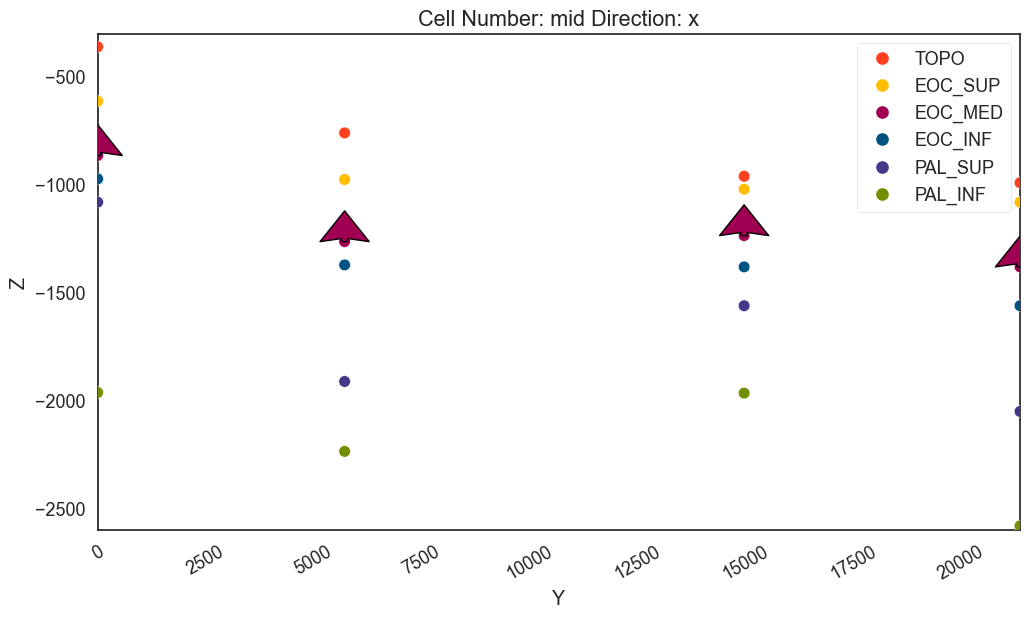

In [2]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name="Santos_Outer_High_PreSal_Lake_v2.0.0",
    extent=[0, 19479.4, 0, 21369.7, -2600, -300],
    resolution=[100, 100, 100],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=data_path + "orientations_points_scaled.csv",
        path_to_surface_points=data_path + "surface_points_full_crono_scaled.csv",
    ),
)
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series": (
            "TOPO",
            "EOC_SUP",
            "EOC_MED",
            "EOC_INF",
            "PAL_SUP",
            "PAL_INF",
            ),
    }
)
#geo_model.grid
#gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=False, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=False, ve=5, legend=True)

In [141]:
gempy_vista_premodel = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    active_scalar_field=None,
    ve=5,
    show_data=True,
    show_results=True,
    show_surfaces=False,
    show_lith=True,
    show_scalar=True,
    show_boundaries=True,
    show_topography=False,
    show_section_trace=True,
    show_values=True,
    show_block=False,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_premodel.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

In [3]:
model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        dtype="float64",
    ))

Setting Backend To: AvailableBackends.PYTORCH
Condition number: 421230.4068552466.


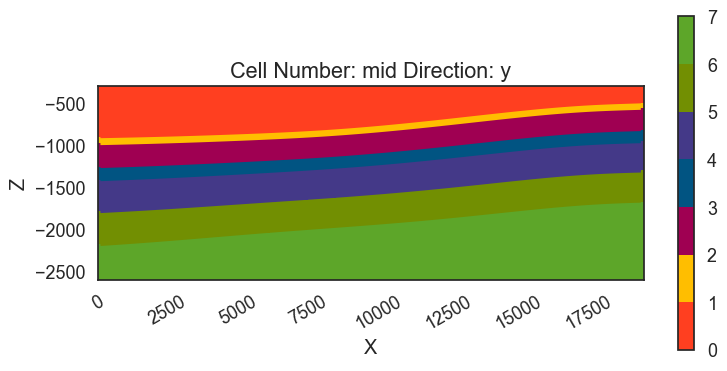

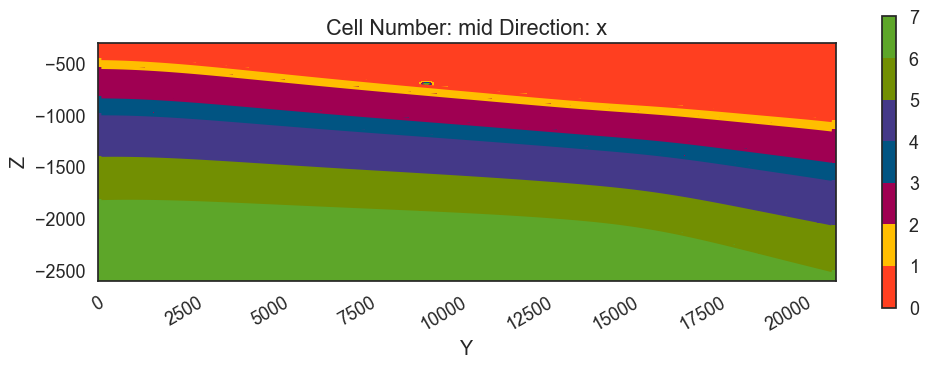

In [ ]:
gpv.plot_2d(geo_model, figsize=(8, 8), direction="y", show_data=False, show_lith=True, ve=3, legend=False)
gpv.plot_2d(geo_model, direction="x", show_data=False, show_lith=True, ve=3, legend=False)

In [115]:
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_values=False,
    show_data=False,
    show_block=False,
    show_lith=True,
    kwargs_plot_structured_grid={'opacity': 0.5},
    #kwargs_pyvista_bounds={'font_size': 2, 'location': 'furthest', 'show_xaxis': False, 'show_yaxis': False, 'show_zaxis': False, 'show_xlabels': False, 'show_ylabels': False, 'show_zlabels': False},
    kwargs_plotter={'lighting': 'three lights'},
    show_boundaries=True,
    show=False  # This prevents the plot from being shown immediately
)
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=1, location="furthest", show_xlabels=False, show_ylabels=False, show_zlabels=False, show_xaxis=False, show_yaxis=False, show_zaxis=False) # show_xaxis=False, show_yaxis=False, show_zaxis=False https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

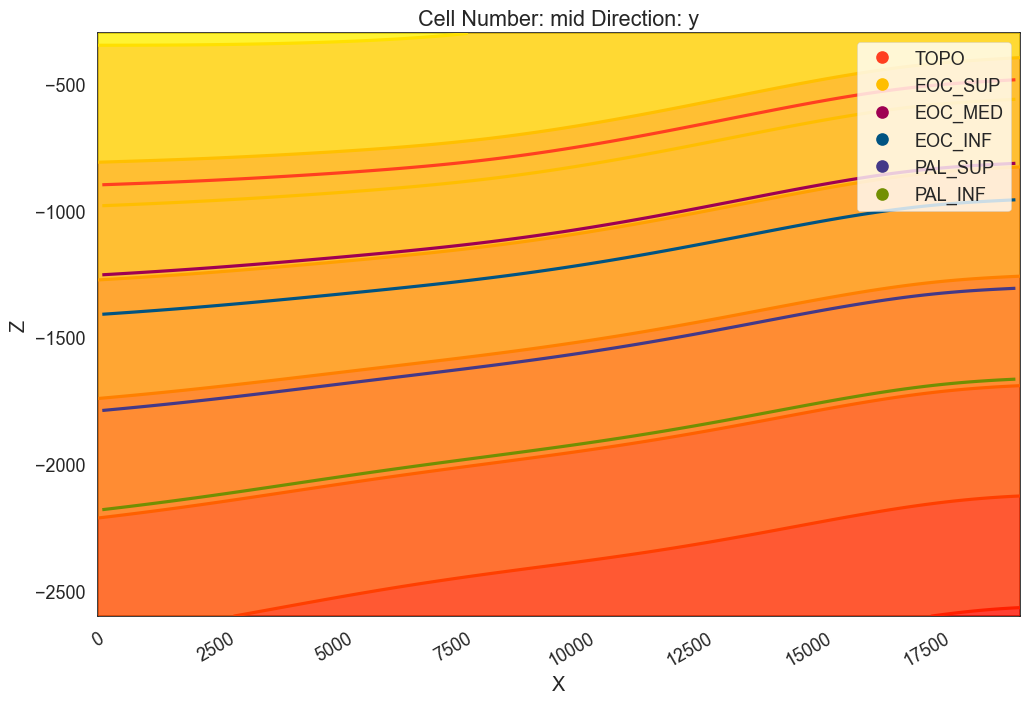

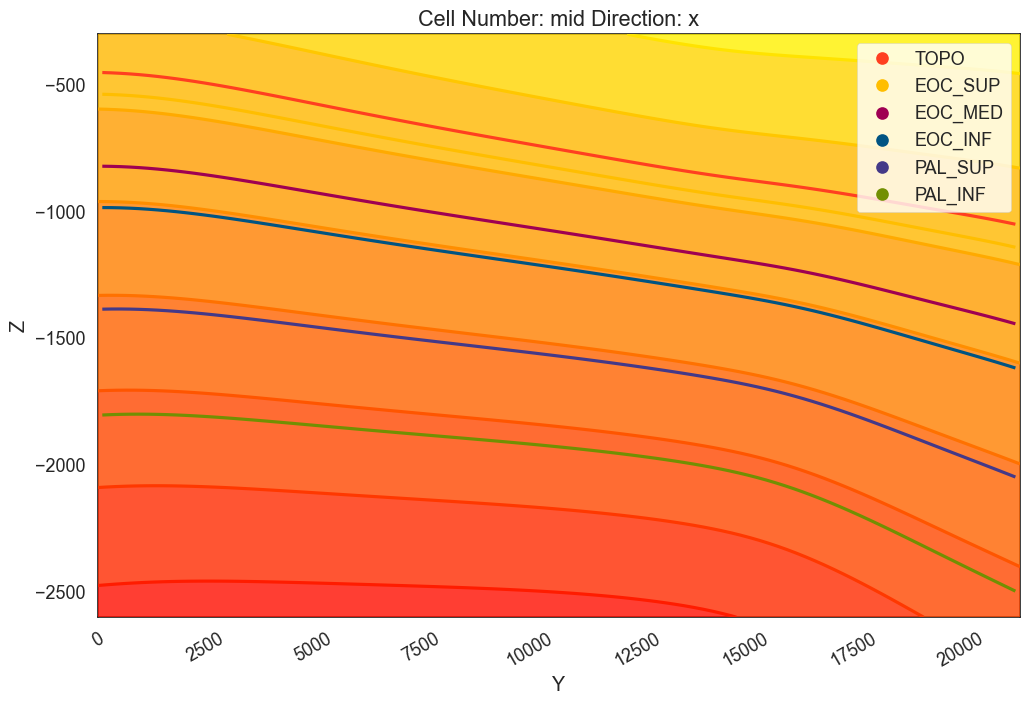

In [74]:
gpv.plot_2d(
    model=geo_model,
    series_n=0,  # This will plot the scalar field used for the stratigraphy
    show_data=False,
    direction="y",
    show_scalar=True,
    show_lith=False
)
gpv.plot_2d(
    model=geo_model,
    series_n=0,  # This will plot the scalar field used for the stratigraphy
    show_data=False,
    direction="x",
    show_scalar=True,
    show_lith=False
)

In [81]:
geo_model.solutions.raw_arrays.mask_matrix

array([[False, False, False, ...,  True,  True,  True]])

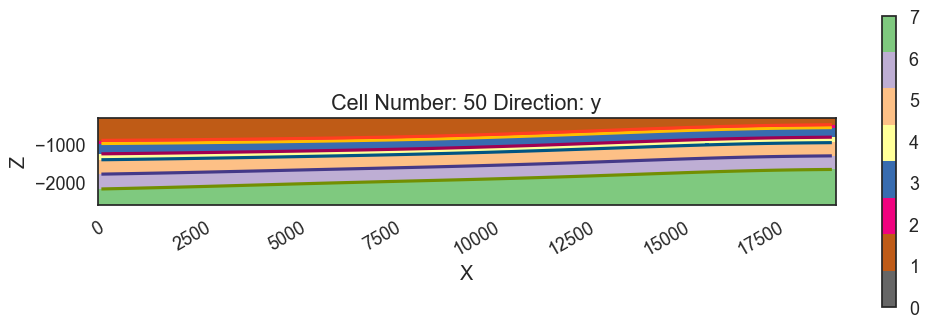

In [105]:
gpv.plot_2d(
    model=geo_model,
    cell_number=50,
    show_data=False,
    show_lith=True,
    show_surfaces=True,
    show_scalar=False,
    #cell_number=2,
    #override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix_squeezed[0],
    kwargs_lithology={'cmap': 'Accent_r'},
    legend=False
)

In [75]:
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_values=False,
    show_data=False,
    show_block=False,
    show_lith=True,
    kwargs_plot_structured_grid={'opacity': 1},
    #kwargs_pyvista_bounds={'font_size': 2, 'location': 'furthest', 'show_xaxis': False, 'show_yaxis': False, 'show_zaxis': False, 'show_xlabels': False, 'show_ylabels': False, 'show_zlabels': False},
    kwargs_plotter={'lighting': 'three lights'},
    show_boundaries=True,
    show=False  # This prevents the plot from being shown immediately
)
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=1, location="furthest", show_xlabels=False, show_ylabels=False, show_zlabels=False, show_xaxis=False, show_yaxis=False, show_zaxis=False) # show_xaxis=False, show_yaxis=False, show_zaxis=False https://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

# Krigagem exemplo

In [4]:
cond_data = np.array([
    [12862.8,21369.7,-1760,2],
    [7801.4,14977.7,-1450,1],
    [0.0,5721.5,-1690,3],
    [7108.9,0.0,-1020,1.5]])

In [5]:
domain = kriging.Domain(
    model_solutions=model,
    transform=geo_model.transform,
    domain=[4],
    data=cond_data
)

In [6]:
variogram_model = kriging.VariogramModel(
    theoretical_model='exponential',
    range_=14,
    sill=np.var(cond_data[:, 3])
)

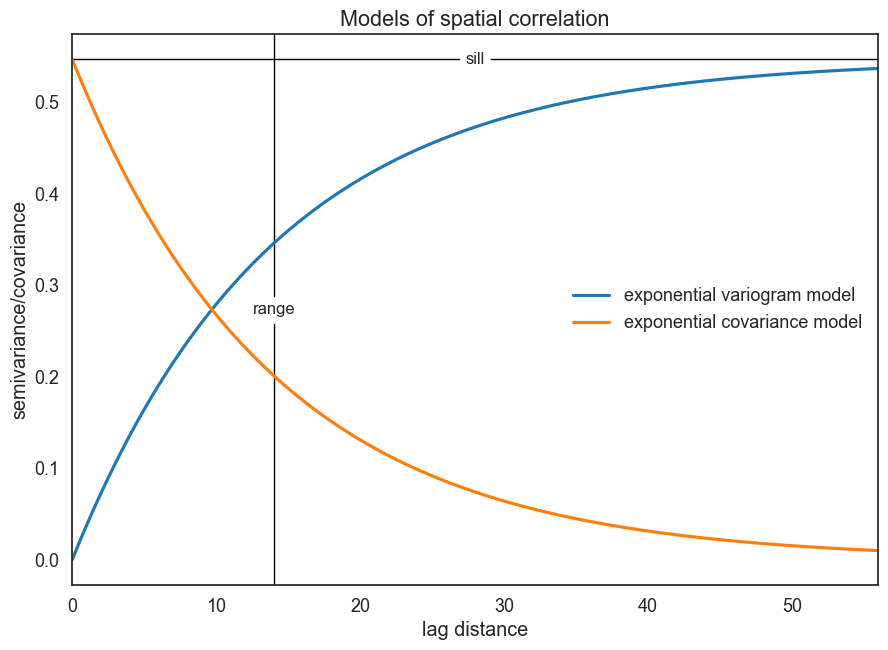

In [7]:
variogram_model.plot(type_='both', show_parameters=True)
plt.show()

In [8]:
kriging_solution = kriging.create_kriged_field(domain, variogram_model)

In [9]:
kriging_solution.results_df

,X,Y,Z,estimated value,estimation variance
0,97.439739,106.891239,-1323.457261,1.875,0.683594
1,97.439739,106.891239,-1300.457261,1.875,0.683594
2,97.439739,106.891239,-1277.457261,1.875,0.683594
3,97.439739,106.891239,-1254.457261,1.875,0.683594
4,97.439739,106.891239,-1231.457261,1.875,0.683594
...,...,...,...,...,...
66564,19382.045739,21262.894239,-1507.457261,1.875,0.683594
66565,19382.045739,21262.894239,-1484.457261,1.875,0.683594
66566,19382.045739,21262.894239,-1461.457261,1.875,0.683594
66567,19382.045739,21262.894239,-1438.457261,1.875,0.683594


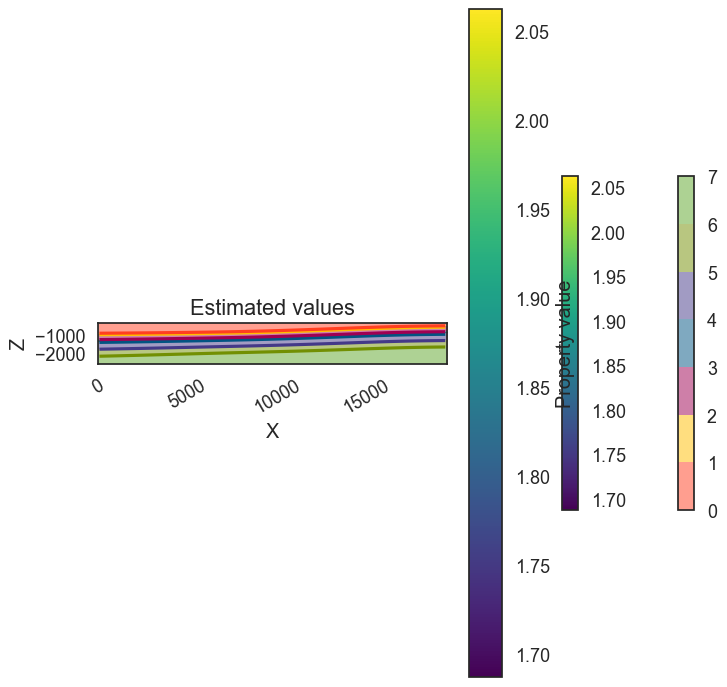

In [132]:
from gempy_viewer.modules.plot_2d.visualization_2d import Plot2D

plot_2d: Plot2D = gpv.plot_2d(
    model=geo_model,
    cell_number=50,
    show_data=False,
    figsize=(8, 8),
    show=False,
    kwargs_lithology={ 'alpha': 0.5 },
    legend=False,
)
kriging.plot_kriging_results(
    geo_data=geo_model,
    kriging_solution=kriging_solution,
    plot_2d=plot_2d,
    title='Estimated values',
    result_column=['estimated value']
)

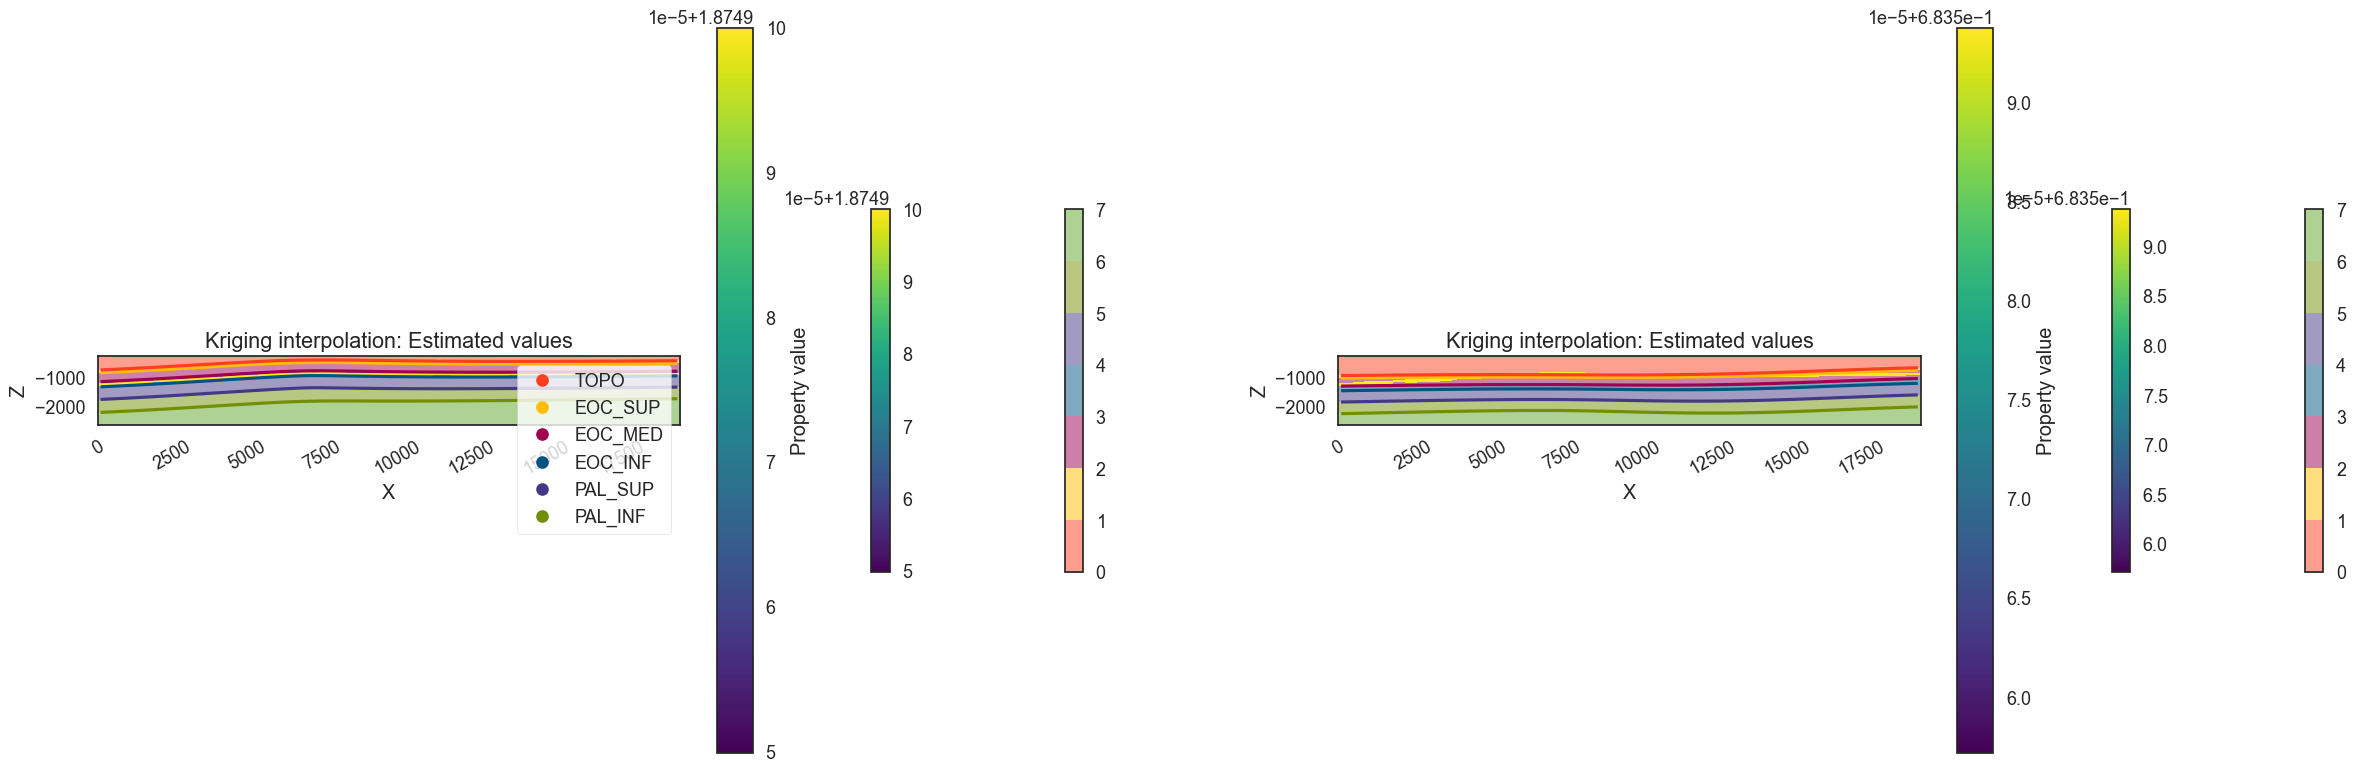

In [137]:
plot_2d_both = gpv.plot_2d(
    model=geo_model,
    cell_number=[0, 80],
    show_data=False,
    show=False,
    kwargs_lithology={ 'alpha': 0.5 }
)

kriging.plot_kriging_results(
    geo_data=geo_model,
    kriging_solution=kriging_solution,
    plot_2d=plot_2d_both,
    title='Kriging interpolation: Estimated values',
    result_column=['estimated value', 'estimation variance']
)

In [10]:
solution_sim = kriging.create_gaussian_field(domain, variogram_model)

In [ ]:
solution_sim.results_df.head()

In [ ]:
solution_sim.results_df['estimated value']

In [ ]:
plot_2d: Plot2D = gpv.plot_2d(
    model=geo_model,
    cell_number=0,
    show_data=False,
    show=False,
    kwargs_lithology={ 'alpha': 0.5 }
)
kriging.plot_kriging_results(
    geo_data=geo_model,
    kriging_solution=solution_sim,
    plot_2d=plot_2d,
    title='Kriging interpolation: Estimated values',
    result_column=['estimated value']
)

# Outras coisas

In [ ]:
"""bounds = [0.0, 179000.0, 0.0, 148000.0, -20000, 500]

# Calculate midpoints
mid_x = (bounds[0] + bounds[1]) / 2
mid_y = (bounds[2] + bounds[3]) / 2

# Set section grid
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'section1': ([bounds[0], mid_y], [bounds[1], mid_y], [200, 150])
    }
)"""

In [ ]:
#gpv.plot_section_traces(geo_model)

In [ ]:
#bes_series = geo_model.structural_frame.get_group_by_name("Strat_Series")

In [ ]:
"""gp.modify_surface_points(
    geo_model=geo_model,
    elements_names=["bes_89", "bes_90", "bes_91", "bes_92", "bes_93", "bes_94", "bes_95", "bes_96", "bes_97", "bes_98", "bes_99", "bes_100"],
    nugget=0.01
)"""

In [ ]:
#geo_model.interpolation_options

In [ ]:
"""geo_model.interpolation_options.number_octree_levels = 5
geo_model.interpolation_options.number_octree_levels_surface = 4
geo_model.interpolation_options.kernel_options.range = .8"""

In [ ]:
#print(geo_model.structural_frame)

In [ ]:
"""model = gp.compute_model(
    geo_model)"""

In [ ]:
"""model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        #dtype="float64", "float32"
    ))"""

In [ ]:
"""import pickle
with open('geo_model.pkl', 'wb') as f:
    pickle.dump(geo_model, f)"""

In [ ]:
#gpv.plot_2d(geo_model, show_topography=False, section_names=['meio'], show_lith=True)

In [ ]:
"""gpv.plot_2d(geo_model, cell_number=[4], direction=['y'], show_topography=True, show_data=True)
gpv.plot_2d(geo_model, cell_number=[-4], direction=['y'], show_topography=True, show_data=True)"""

In [ ]:
#gpv.plot_3d(geo_model, show_lith=True, show_topography=False, kwargs_plot_structured_grid={'opacity': 0.8})